In [83]:
import pandas as pd
import numpy as np
import seaborn as sns


import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [14]:
from bs4 import BeautifulSoup
import requests

In [15]:
i = 1
headers = ["Area", "Front", "Rooms", "Apartments", "Living Rooms", "Bathrooms", "Width Street", "Age", "Price"]
houses_list = []

while len(houses_list) < 100:
    url = f"https://sa.aqar.fm/%D9%81%D9%84%D9%84-%D9%84%D9%84%D8%A8%D9%8A%D8%B9/%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6/{i}"
    response = requests.get(url)

    if response.status_code == 200:
        page = response.text
        soup = BeautifulSoup(page, "lxml")
        house_url = soup.find_all("a", class_="listTitle")
        for house in house_url:
            house_page = f"https://sa.aqar.fm{house['href']}"
            response = requests.get(house_page)
            page = response.text
            soup = BeautifulSoup(page, "lxml")
            # get the table and rows 
            table = soup.find("table",class_="dc-detailsTable")
            rows = table.find_all("tr") 
            if len(rows) >= 8:
                area = int(rows[0].find_all("td")[0].text.replace(" م²", ""))
                front = rows[1].find_all("td")[0].text.split()[0]
                rooms = int(rows[2].find_all("td")[0].text)
                apt = int(rows[3].find_all("td")[0].text)
                living = int(rows[4].find_all("td")[0].text)
                baths = int(rows[5].find_all("td")[0].text)
                st = int(rows[6].find_all("td")[0].text.replace(" م", ""))
                age_row = rows[7].find_all("td")[0].text
                #if age_row == "جديد":
                    #age = "new"
                #else:
                    #age = "old"
                price = int(soup.find("span", class_="listingPagePrice").find_all("span")[1].text.replace(",",""))
                house_dict = dict(zip(headers, [area, front, rooms, apt, living,baths,st,age, price]))
                houses_list.append(house_dict)
    else:
        break
        
    i += 1
    print(i)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


In [16]:
df123 = pd.DataFrame(houses_list)
df123

,Area,Front,Rooms,Apartments,Living Rooms,Bathrooms,Width Street,Age,Price
0,360,جنوب,5,4,3,5,15,new,2000000
1,355,جنوب,3,3,2,3,20,new,1900000
2,300,شمال,7,1,3,5,18,new,1350000
3,390,شمال,5,3,1,3,15,new,1750000
4,375,جنوب,6,2,2,5,20,new,3200000
...,...,...,...,...,...,...,...,...,...
98,360,جنوب,5,4,3,5,15,new,2000000
99,270,جنوب,5,1,2,5,15,new,1200000
100,300,غرب,5,2,4,5,15,new,1430000
101,450,شمال,5,5,2,5,20,new,2900000


In [17]:
df = pd.DataFrame(houses_list)
df.to_csv("Saleh123.csv")

In [45]:
df12= pd.read_csv('Saleh.csv')

In [46]:
df12.head(99)

,Unnamed: 0,area,front,rooms,apt,living,baths,st,age,price
0,0,355,جنوب,3,3,2,3,20,new,1900000
1,1,312,شمال,4,1,2,4,15,new,2600000
2,2,420,غرب,7,2,5,5,15,new,3100000
3,3,343,شمال,3,2,1,3,20,new,2250000
4,4,500,شمال,7,1,3,5,15,new,2100000
...,...,...,...,...,...,...,...,...,...,...
94,94,440,شمال,5,2,3,5,16,new,1950000
95,95,530,جنوب,3,4,1,2,15,old,2000000
96,96,384,شمال,7,2,3,5,15,new,1750000
97,97,420,غرب,5,2,2,4,15,old,1800000


In [50]:
#df12.drop(['Unnamed: 0'], axis = 1, inplace = True)
#f12.drop(['baths'], axis = 1, inplace = True)
#df12.drop(['apt'], axis = 1, inplace = True)
df12.drop(['front'], axis = 1, inplace = True)
df12.drop(['age'], axis = 1, inplace = True)




In [51]:
df12.head()

,area,rooms,living,st,price
0,355,3,2,20,1900000
1,312,4,2,15,2600000
2,420,7,5,15,3100000
3,343,3,1,20,2250000
4,500,7,3,15,2100000


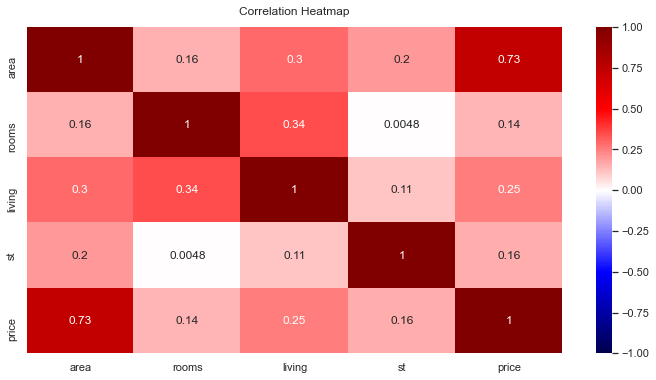

In [52]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df12.corr(), vmin=-1, vmax=1, annot=True,cmap='seismic')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [11]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(['Width Street'], axis = 1, inplace = True)
df.drop(['Age'], axis = 1, inplace = True)
df.drop(['Living Rooms'], axis = 1, inplace = True)
df.drop(['Apartments'], axis = 1, inplace = True)
df.drop(['Front'], axis = 1, inplace = True)

In [12]:
df.head()

,Area,Rooms,Bathrooms,Price
0,360,5,5,1200000
1,404,7,4,1200000
2,375,7,5,1900000
3,300,7,5,1350000
4,300,7,5,1300000


In [55]:
X,y = df12.iloc[:,0:4],df12['price']

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    447 non-null    int64
 1   rooms   447 non-null    int64
 2   living  447 non-null    int64
 3   st      447 non-null    int64
dtypes: int64(4)
memory usage: 14.1 KB


In [57]:
y

0      1900000
1      2600000
2      3100000
3      2250000
4      2100000
        ...   
442    2000000
443    1550000
444    1300000
445    2200000
446    3200000
Name: price, Length: 447, dtype: int64

In [58]:
model = LinearRegression()
mo

In [66]:
z=model.predict(X_test)

In [67]:
z

array([2649596.27349157, 1719028.04634938, 5892665.03466598,
       1481450.53302216, 1283927.04776414, 1391669.46585025,
       1239079.12994581, 1426380.57232094, 2297656.84839396,
        875317.01912609,  834967.92400089, 1908399.6881103 ,
       1991433.01767356, 1360668.89769535, 1813941.08271553,
       2411083.99713181, 1878426.6568607 , 1574862.24989728,
       2426269.57276276, 1111764.43902273, 4037817.95026805,
       1766711.78001814, 1719028.04634938, 1853166.63388558,
       2225903.72217887, 2488270.70907256, 1300073.07382674,
       2676978.5807724 , 3133235.88016553, 3432393.74187755,
       1028914.5474594 , 1782649.17711275, 1735711.21186324,
       2076109.00960307, 1719028.04634938, 1809780.33946752,
       1422670.03400515, 1094181.36007545, 2632631.8359227 ,
       1476620.67679038, 1433025.75340432, 1760910.69784014,
       1693828.56037249, 1509926.47081988, 1391669.46585025,
       1943693.46947675, 1277122.99919641,  935912.8429947 ,
       2099596.22368467,

In [71]:
len(z)

90

In [78]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''

     # perform train/val split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24) # "= \ to coinsder this line with the above one"
    
    # fit linear regression to training data
    lr_model = LinearRegression() 
    lr_model.fit(X_train, y_train)
    model=lr_model
    
    # fit Ridge regression 
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_test_scaled = scaler.transform(X_test)

    lm_reg = Ridge(alpha=2)
    lm_reg.fit(X_scaled,y)


    
    # score fit model on validation data
    val_score_linear = cross_val_score(lr_model, X, y, cv = 5).mean()
    val_score_rid = cross_val_score(lm_reg, X, y, cv = 5).mean()
    
    # report results

    print(f'Linear Regression test R^2: {lr_model.score(X_test, y_test):.3f}')
    print('\nCross Validation for Linear model score was:', val_score_linear)
#     X_poly_test = poly_reg.fit_transform(X_test)
    print(f'\nRidge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')
#     print(X_poly_test)
    print('\nCross Validation for Ridge model was score was:', val_score_rid)
#     print('Feature coefficient results: \n')
#     for feature, coef in zip(X.columns, lr_model.coef_):
#         print(feature, ':', f'{coef:.2f}') # "means

In [60]:
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.20, random_state=24)

In [61]:
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train)
model=lr_model

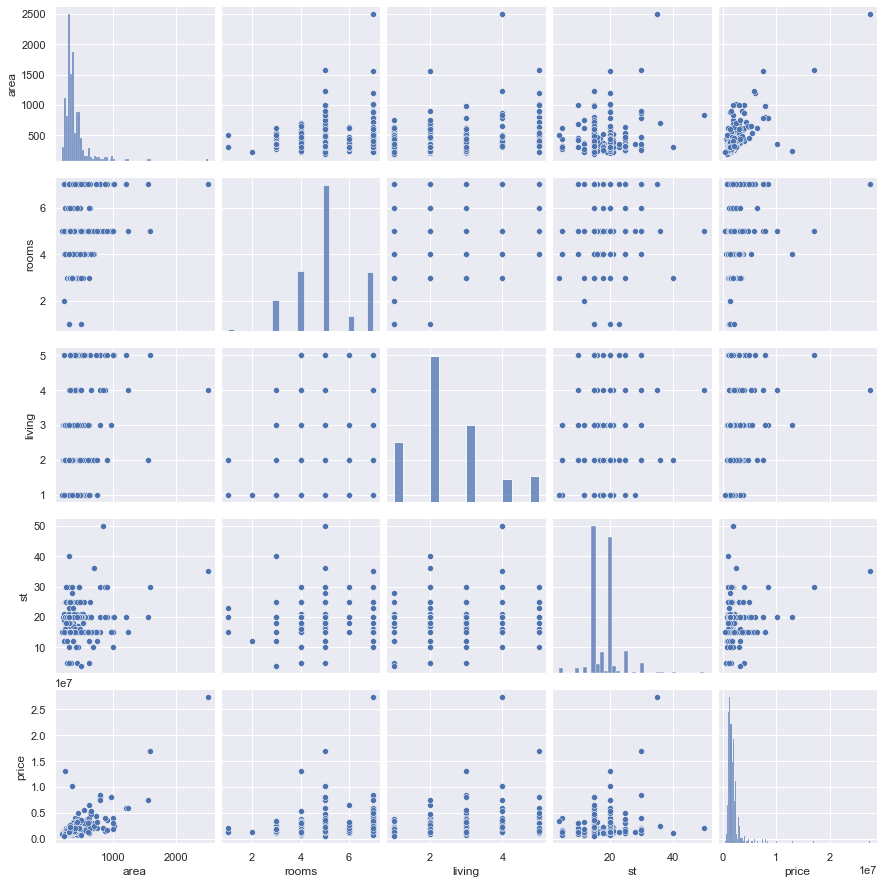

In [63]:
sns.pairplot(df12)

In [50]:
model.coef_

array([  1871.91101099, -34650.99228517, 177044.85273183])

In [76]:
split_and_validate(X,y)

Linear Regression test R^2: 0.187

Cross Validation for Linear model score was: 0.20311700357923962

Ridge Regression test R^2: 0.232

Cross Validation for Ridge model was score was: 0.20315856037649835


In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [72]:
mse1 = mean_squared_error(y_test, z, squared=True)
rmse1 = mean_squared_error(y_test, z, squared=False)
mae1 = mean_absolute_error(y_test, z)
r2_score3 = r2_score(y_test,z)

In [73]:
print('Mean Square Error = ', mse1)
print ('Root Mean Square Error =', rmse1)
print ('Mean Absoluter Error=', mae1)
print ('r2=', r2_score3)

Mean Square Error =  842514029223.134
Root Mean Square Error = 917885.6297072822
Mean Absoluter Error= 573718.895073008
r2= 0.18749943084446363


In [81]:
X_test_scaled

NameError: name 'X_test_scaled' is not defined

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

In [86]:
X_test_scaled

array([[ 0.34250326,  0.81316825,  2.33770743, -0.68910687],
       [-0.20008633, -1.6263365 , -0.38826271,  0.41573807],
       [ 2.33025937,  0.        ,  1.42905072,  7.04480771],
       [-0.33051652, -0.81316825, -0.38826271, -0.68910687],
       [-0.7270243 ,  1.6263365 ,  0.520394  ,  1.52058301],
       [-0.48703275,  0.        , -0.38826271,  0.41573807],
       [-0.54963924, -0.81316825, -0.38826271, -0.0261999 ],
       [-0.48703275,  1.6263365 ,  0.520394  , -0.68910687],
       [ 0.29554839,  0.        , -1.29691943, -0.68910687],
       [-0.80006521,  0.        , -0.38826271, -0.68910687],
       [-0.80006521, -0.81316825, -1.29691943, -0.0261999 ],
       [-0.17400029,  0.        ,  1.42905072, -0.0261999 ],
       [ 0.22772469, -0.81316825, -1.29691943, -2.89879674],
       [-0.48703275, -0.81316825, -0.38826271,  0.41573807],
       [-0.12182822,  0.        , -0.38826271, -0.46813788],
       [ 0.26424515,  0.        , -0.38826271,  0.41573807],
       [-0.17400029,  1.